<a href="https://colab.research.google.com/github/SamanMansoor/Data-Science/blob/main/Stress_Data_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import warnings
import os

In [5]:
!pip install pyreadstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Load Data**

In [6]:
import pyreadstat

# Specify the path to your .sav file
file_path = '/content/Stress.sav'

# Load the .sav file
data, meta = pyreadstat.read_sav(file_path)

# Access the data and metadata information
print("Data:")
print(data.head())  # Assuming you want to print the first few rows of the data
print("Metadata:")
print(meta)


Data:
   Gender  AreaLiving  Ageinyears  Province  WeightKG  HeightFeet  Heightm  \
0     2.0         1.0        18.0       1.0      55.0         5.0   1.5240   
1     2.0         1.0        18.0       1.0      55.0         5.0   1.5240   
2     2.0         1.0        18.0       1.0      55.0         5.0   1.5240   
3     1.0         1.0        18.0       1.0     120.0         6.0   1.8288   
4     1.0         1.0        18.0       1.0      99.0         5.5   1.6764   

         BMI  No.ofsiblingsTotalnumberofsistersampBrothers  \
0  23.680603                                           0.0   
1  23.680603                                           0.0   
2  23.680603                                           0.0   
3  35.879701                                           0.0   
4  35.227343                                           0.0   

   YourHighestQualification  ...   Burnout       SFS       MIS       SIS  \
0                       2.0  ...  0.256748 -0.145994  0.783488  0.284563   


In [7]:
#All info about data 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11401 entries, 0 to 11400
Columns: 148 entries, Gender to TS
dtypes: float64(148)
memory usage: 12.9 MB
None


In [8]:
#Summary Statistic
print(data.describe())

             Gender    AreaLiving    Ageinyears      Province      WeightKG  \
count  11385.000000  11401.000000  11401.000000  11168.000000  11401.000000   
mean       1.601405      1.223489     22.317867      1.311784     61.680028   
std        5.222502      0.416602      6.936049      0.942626     12.745645   
min        1.000000      1.000000     10.000000      1.000000     30.000000   
25%        1.000000      1.000000     19.000000      1.000000     52.000000   
50%        2.000000      1.000000     20.000000      1.000000     60.000000   
75%        2.000000      1.000000     23.000000      1.000000     70.000000   
max      556.000000      2.000000     87.000000      6.000000    140.000000   

         HeightFeet       Heightm           BMI  \
count  11401.000000  11401.000000  11401.000000   
mean       5.477270      1.669473     21.858801   
std        0.389407      0.118691      1.814952   
min        3.900000      1.188720     15.300765   
25%        5.200000      1.584960

In [9]:
print(data.shape)

(11401, 148)


In [10]:
data.isnull()

,Gender,AreaLiving,Ageinyears,Province,WeightKG,HeightFeet,Heightm,BMI,No.ofsiblingsTotalnumberofsistersampBrothers,YourHighestQualification,...,Burnout,SFS,MIS,SIS,TMS,PS,GSS,TeS,RS,TS
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11396,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11397,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11398,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11399,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
data.isnull().sum()

Gender         16
AreaLiving      0
Ageinyears      0
Province      233
WeightKG        0
             ... 
PS              0
GSS             0
TeS             0
RS              0
TS              0
Length: 148, dtype: int64

<Axes: >

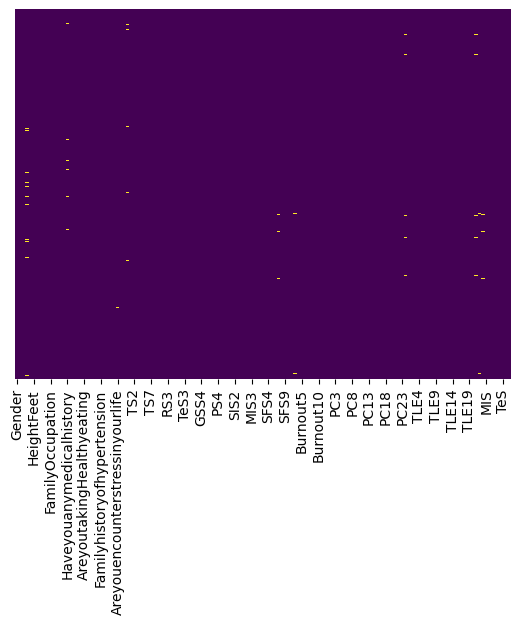

In [12]:
# Heatmap to check missing values 
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
#Drop the NUll Values. 
data.dropna()

,Gender,AreaLiving,Ageinyears,Province,WeightKG,HeightFeet,Heightm,BMI,No.ofsiblingsTotalnumberofsistersampBrothers,YourHighestQualification,...,Burnout,SFS,MIS,SIS,TMS,PS,GSS,TeS,RS,TS
0,2.0,1.0,18.0,1.0,55.0,5.0,1.52400,23.680603,0.0,2.0,...,0.256748,-0.145994,0.783488,0.284563,0.564496,-0.125628,0.208038,0.874855,0.014979,-0.021860
1,2.0,1.0,18.0,1.0,55.0,5.0,1.52400,23.680603,0.0,1.0,...,0.655349,0.527734,1.182439,1.001435,0.564496,0.539846,1.305324,0.861142,1.470899,0.458568
2,2.0,1.0,18.0,1.0,55.0,5.0,1.52400,23.680603,0.0,3.0,...,-1.243747,-0.395644,-0.858351,-1.128449,-1.120543,-0.915767,-0.765125,-0.792516,-0.790512,-0.865622
3,1.0,1.0,18.0,1.0,120.0,6.0,1.82880,35.879701,0.0,1.0,...,2.426962,2.066089,-0.248795,-2.193390,-2.098209,-1.526689,-1.767377,-1.535098,-1.782991,-2.243074
4,1.0,1.0,18.0,1.0,99.0,5.5,1.67640,35.227343,0.0,3.0,...,-0.409561,1.260472,-1.878746,-1.938331,-2.098209,-2.184188,-2.280591,-1.871443,-1.921218,-2.222361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11395,1.0,1.0,80.0,1.0,135.0,6.1,1.85928,39.052080,6.0,1.0,...,-0.523027,0.160180,-0.584555,-0.134539,0.127416,0.053590,0.794018,0.018299,1.111339,0.659702
11396,2.0,2.0,80.0,1.0,100.0,5.2,1.58496,39.807361,6.0,1.0,...,0.038640,-0.008531,-0.091400,-0.644658,-0.579957,-0.283135,0.081783,1.112090,0.478420,0.711596
11397,2.0,1.0,82.0,1.0,88.0,6.2,1.88976,24.641626,7.0,2.0,...,1.604457,0.774097,1.182439,1.001435,0.834789,0.993261,1.011269,1.365339,1.470899,0.675428
11398,2.0,1.0,85.0,1.0,54.0,4.0,1.21920,36.328198,7.0,1.0,...,0.191787,0.043037,0.162044,-0.631494,-0.142877,0.148568,0.583020,0.064040,0.831249,-0.214867


In [14]:
#Remove Null Values
data=data.fillna('0')

In [15]:
data.isnull().sum()

Gender        0
AreaLiving    0
Ageinyears    0
Province      0
WeightKG      0
             ..
PS            0
GSS           0
TeS           0
RS            0
TS            0
Length: 148, dtype: int64

<Axes: >

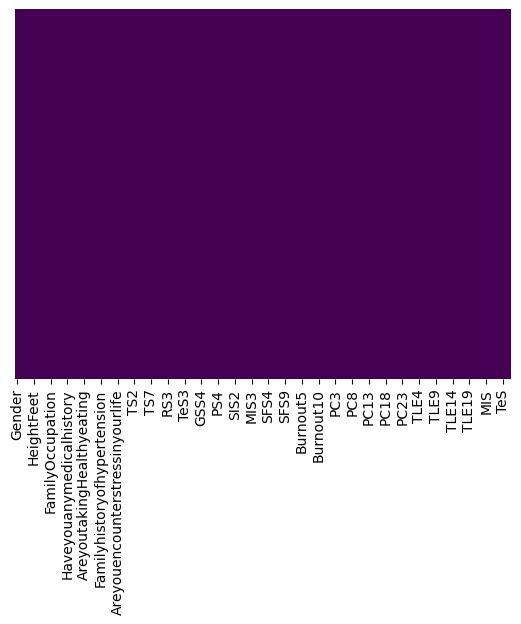

In [16]:
# Heatmap to check missing values 
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
data.dtypes

Gender         object
AreaLiving    float64
Ageinyears    float64
Province       object
WeightKG      float64
               ...   
PS            float64
GSS           float64
TeS           float64
RS            float64
TS            float64
Length: 148, dtype: object

In [18]:
# Specify the column names of the features you want to select
selected_features = ['TLE', 'PC', 'Burnout','SFS','MIS','SIS','TMS','PS','GSS','TeS','RS','TS','FamilyBPhistory','Familyhistoryofhypertension','Doyouthinkthatyouarelivingahealthylife','Howoftendoyouhavetroublefallingasleeporstayingasleep','EmotionalStatus']

# Select the desired features from the DataFrame
Final_data = data[selected_features]

# Print the selected data
print(Final_data.head())


        TLE        PC   Burnout       SFS       MIS       SIS       TMS  \
0 -0.494186 -1.441012  0.256748 -0.145994  0.783488  0.284563  0.564496   
1  0.106513 -0.157086  0.655349  0.527734  1.182439  1.001435  0.564496   
2  0.584385  0.601437 -1.243747 -0.395644 -0.858351 -1.128449 -1.120543   
3  1.619023  2.664655  2.426962  2.066089 -0.248795 -2.193390 -2.098209   
4  1.174131  1.376269 -0.409561  1.260472 -1.878746 -1.938331 -2.098209   

         PS       GSS       TeS        RS        TS  FamilyBPhistory  \
0 -0.125628  0.208038  0.874855  0.014979 -0.021860              1.0   
1  0.539846  1.305324  0.861142  1.470899  0.458568              1.0   
2 -0.915767 -0.765125 -0.792516 -0.790512 -0.865622              2.0   
3 -1.526689 -1.767377 -1.535098 -1.782991 -2.243074              2.0   
4 -2.184188 -2.280591 -1.871443 -1.921218 -2.222361              1.0   

   Familyhistoryofhypertension  Doyouthinkthatyouarelivingahealthylife  \
0                          1.0            

In [19]:
Final_data.dtypes

TLE                                                      object
PC                                                       object
Burnout                                                  object
SFS                                                      object
MIS                                                     float64
SIS                                                     float64
TMS                                                     float64
PS                                                      float64
GSS                                                     float64
TeS                                                     float64
RS                                                      float64
TS                                                      float64
FamilyBPhistory                                         float64
Familyhistoryofhypertension                             float64
Doyouthinkthatyouarelivingahealthylife                  float64
Howoftendoyouhavetroublefallingasleepors

In [20]:
import pandas as pd

# Assuming you have a DataFrame 'data' with columns of type 'object'
# Assuming you want to change the data type of certain columns

# Create a new DataFrame to store the modified data
modified_data = Final_data.copy()

# List of columns to change the data type
columns_to_change =  ['TLE', 'PC', 'Burnout','SFS','MIS','SIS','TMS','PS','GSS','TeS','RS','TS','FamilyBPhistory','Familyhistoryofhypertension','Doyouthinkthatyouarelivingahealthylife','Howoftendoyouhavetroublefallingasleeporstayingasleep','EmotionalStatus']

# Change the data type of the selected columns to the desired type
desired_type = object  # Change to the desired data type (e.g., int, float)
modified_data[columns_to_change] = modified_data[columns_to_change].astype(int)

# The 'modified_data' DataFrame now contains the updated data types
print(modified_data.head())


   TLE  PC  Burnout  SFS  MIS  SIS  TMS  PS  GSS  TeS  RS  TS  \
0    0  -1        0    0    0    0    0   0    0    0   0   0   
1    0   0        0    0    1    1    0   0    1    0   1   0   
2    0   0       -1    0    0   -1   -1   0    0    0   0   0   
3    1   2        2    2    0   -2   -2  -1   -1   -1  -1  -2   
4    1   1        0    1   -1   -1   -2  -2   -2   -1  -1  -2   

   FamilyBPhistory  Familyhistoryofhypertension  \
0                1                            1   
1                1                            1   
2                2                            2   
3                2                            2   
4                1                            1   

   Doyouthinkthatyouarelivingahealthylife  \
0                                       3   
1                                       1   
2                                       1   
3                                       2   
4                                       1   

   Howoftendoyouhavetroublefall

**This is a classification problem it would be important and interesting to the distribution of target variables for the data.**

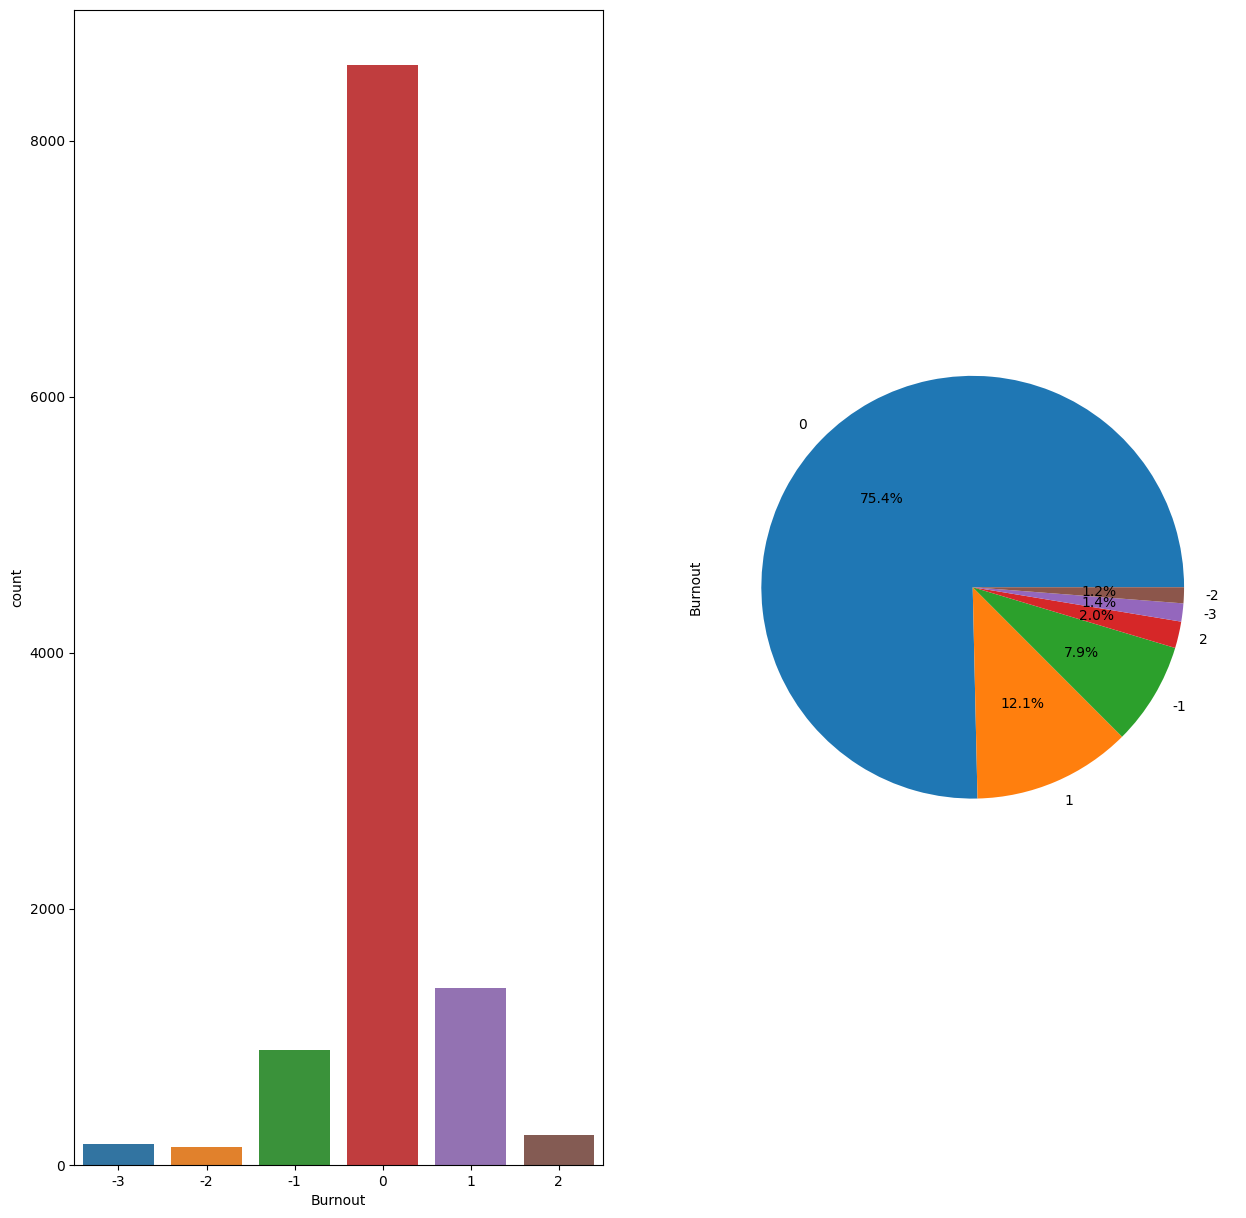

In [21]:
fig, ax=plt.subplots(1,2,figsize=(15,15))
_ = sns.countplot(x='Burnout', data=modified_data, ax=ax[0])
_ = modified_data['Burnout'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1])

**Let's check the distribution of data using Histogram and Density visualisation method**

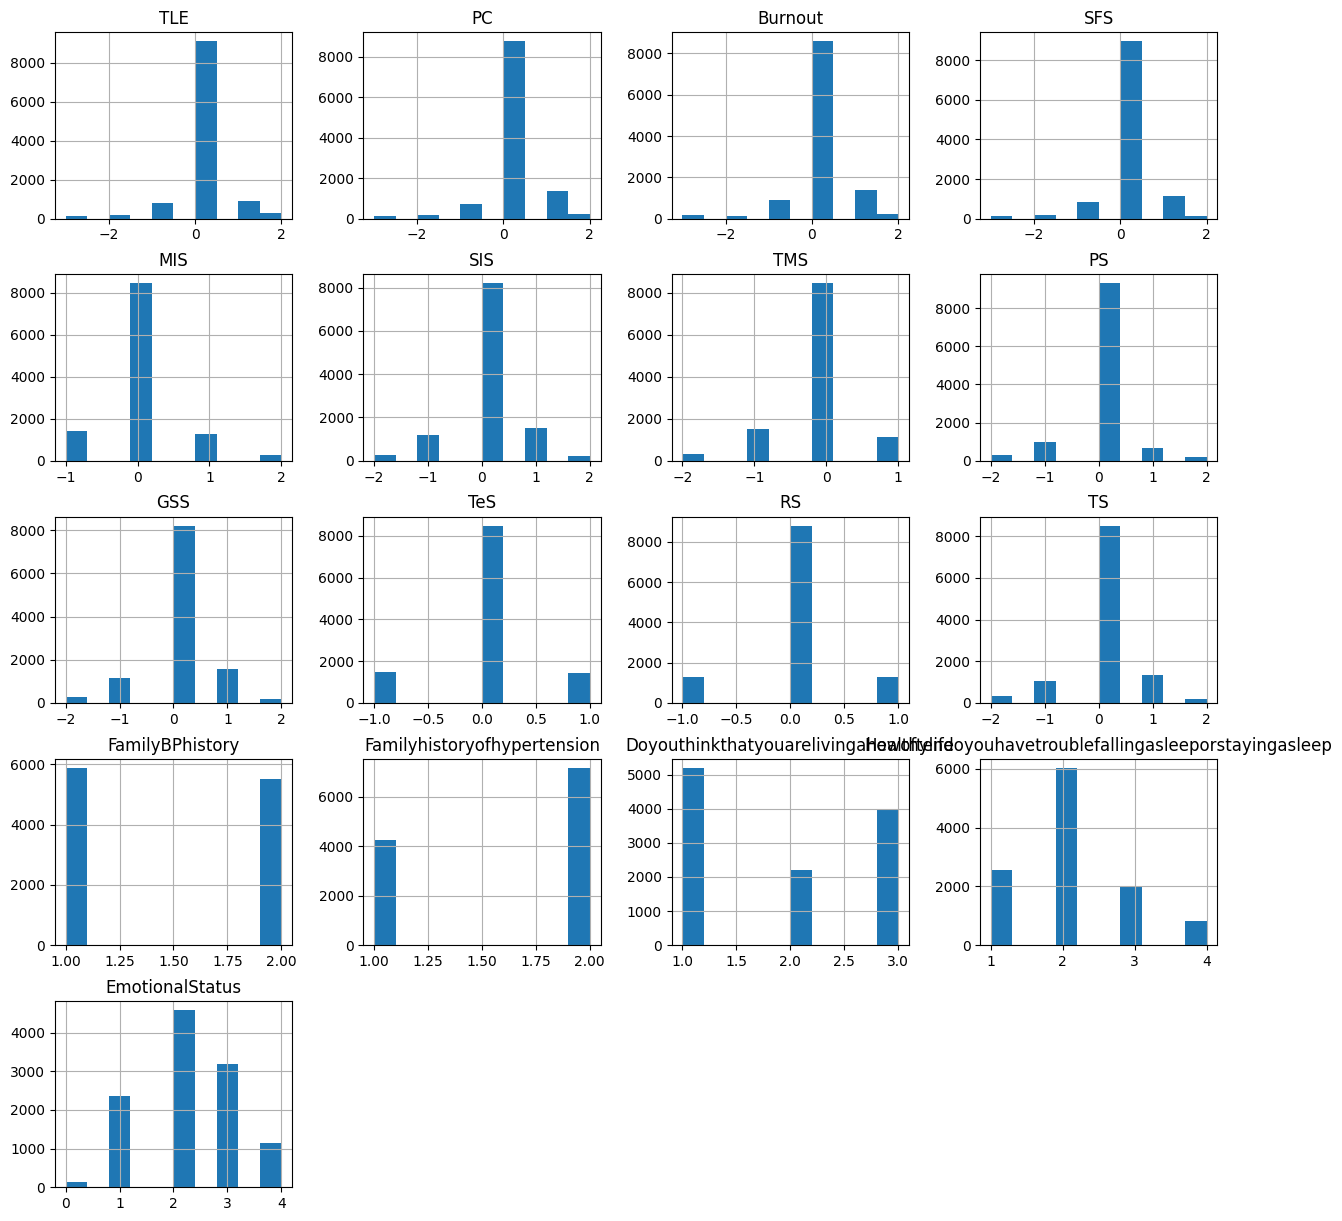

In [22]:
modified_data.hist(figsize=(15,15))
plt.show()

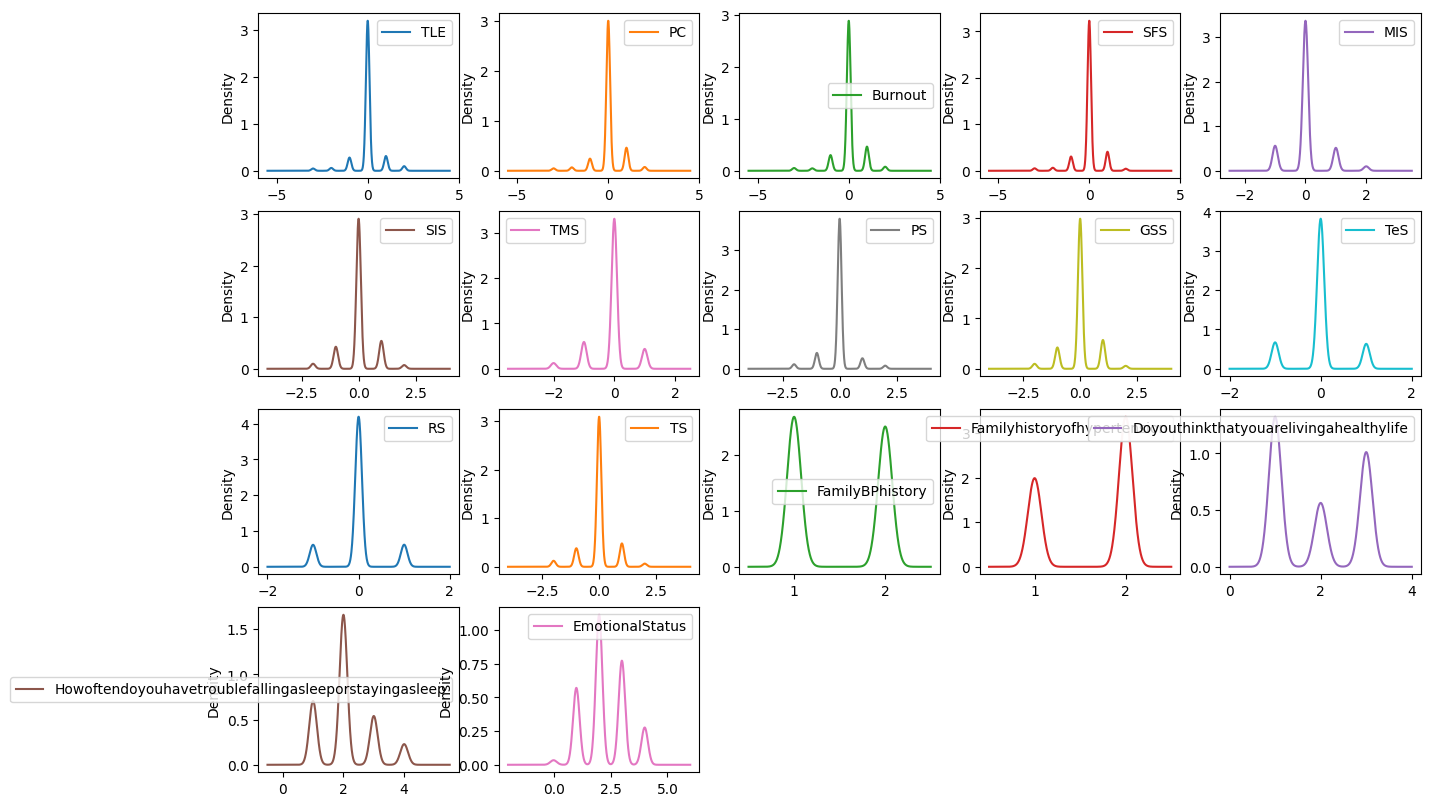

In [23]:
modified_data.plot(kind="density", layout=(6,5), 
             subplots=True,sharex=False, sharey=False, figsize=(15,15))
plt.show()

# **Check the correlation between various features.**


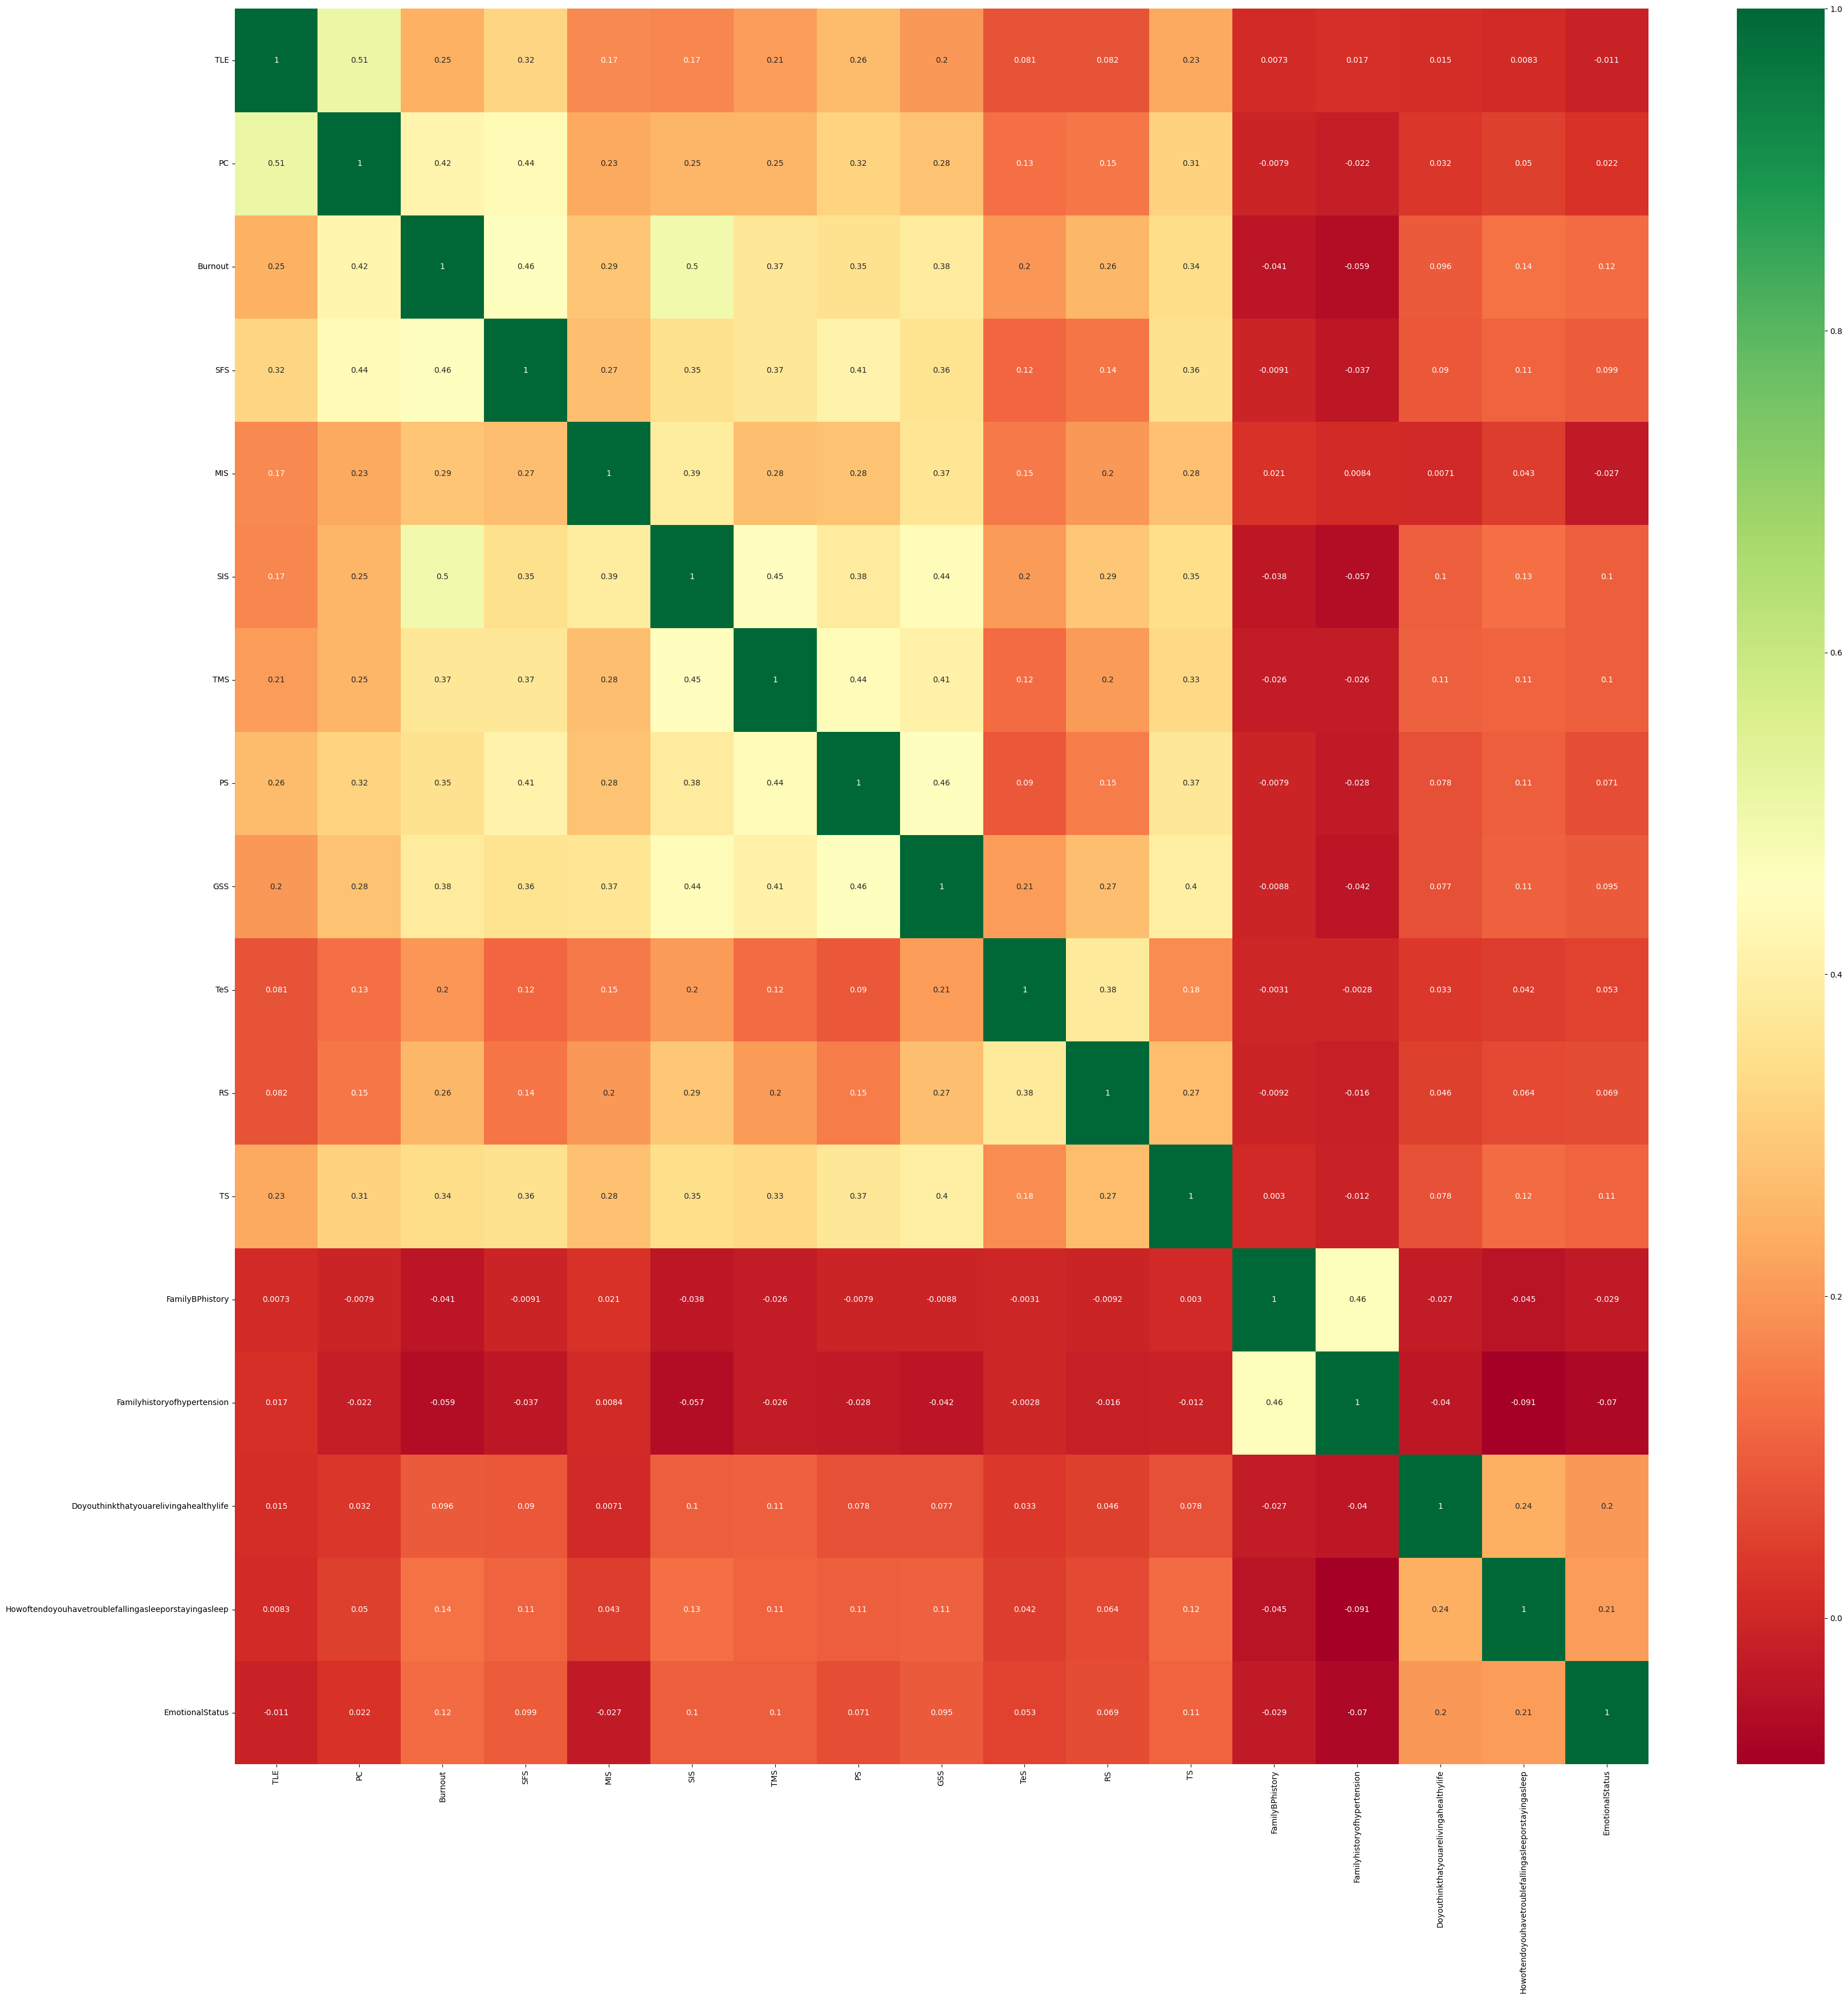

In [24]:
import seaborn as sns
corrmat = modified_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(40,40))
#plot heat map
g=sns.heatmap(modified_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

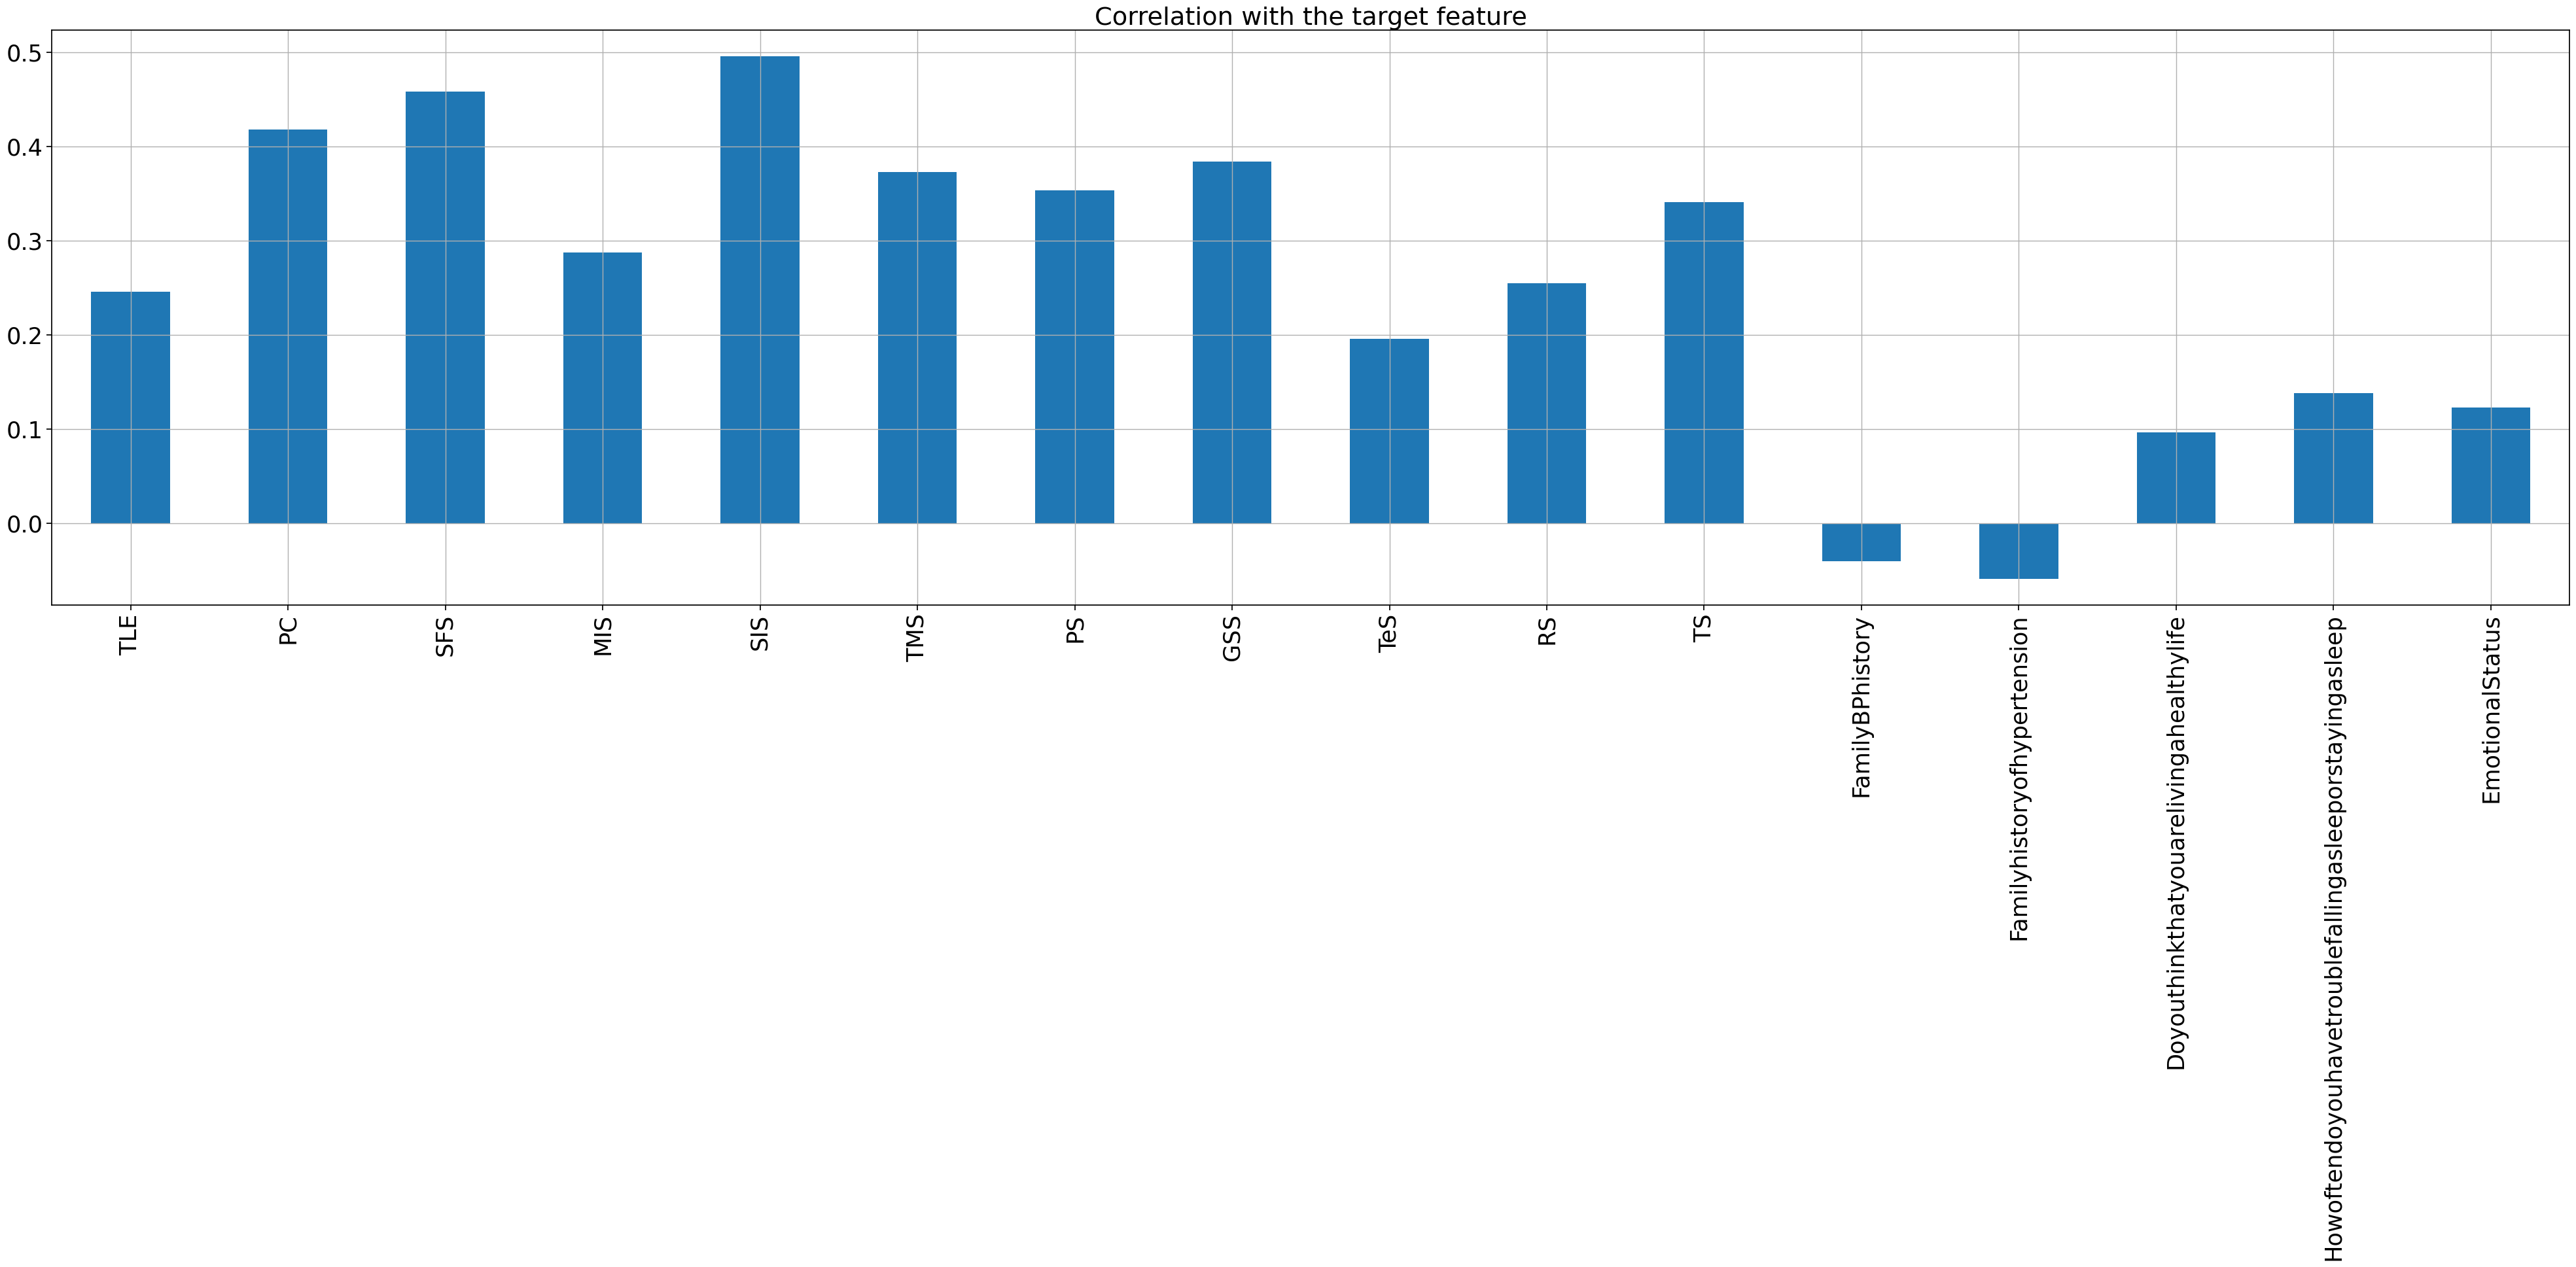

In [25]:
sns.set_context('notebook',font_scale = 2.3)
modified_data.drop('Burnout', axis=1).corrwith(modified_data.Burnout).plot(kind='bar', grid=True, figsize=(40, 20), 
                                                        title="Correlation with the target feature")
plt.tight_layout()

In [26]:
X = modified_data.drop(['Burnout'], axis=1)

y = modified_data['Burnout']

In [27]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [28]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape


((7980, 16), (3421, 16))

In [29]:
one_hot_encoded_training_predictors = pd.get_dummies(X_train)

In [30]:
cols = X_train.columns

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

#**Apply Model**

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

#**Logistic Regression**


In [33]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 76.99%
_______________________________________________
CLASSIFICATION REPORT:
                   -3    -2          -1            0           1           2  \
precision    0.666667   0.0    0.112903     0.775413    0.710744    0.971429   
recall       0.059406   0.0    0.011309     0.996188    0.088935    0.209877   
f1-score     0.109091   0.0    0.020558     0.872044    0.158088    0.345178   
support    101.000000  97.0  619.000000  6034.000000  967.000000  162.000000   

           accuracy    macro avg  weighted avg  
precision  0.769925     0.539526      0.709364  
recall     0.769925     0.227619      0.769925  
f1-score   0.769925     0.250826      0.688527  
support    0.769925  7980.000000   7980.000000  
_______________________________________________
Confusion Matrix: 
 [[   6    1   38   56    0    0]
 [   2    0   13   82    0    0]
 [   0    0    7  612    0    0]
 [   1    0    2 6011   19    1]
 [   0    0    1  880   86    0]
 [   0    0  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                         columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,76.992481,76.059632


# **Random Forest classifier model**

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 97.74%
_______________________________________________
CLASSIFICATION REPORT:
                   -3         -2          -1            0           1  \
precision    0.980392   1.000000    0.992754     0.973335    0.989831   
recall       0.990099   0.979381    0.885299     0.998177    0.905895   
f1-score     0.985222   0.989583    0.935952     0.985600    0.946004   
support    101.000000  97.000000  619.000000  6034.000000  967.000000   

                    2  accuracy    macro avg  weighted avg  
precision    1.000000  0.977444     0.989385      0.977795  
recall       0.975309  0.977444     0.955693      0.977444  
f1-score     0.987500  0.977444     0.971644      0.977033  
support    162.000000  0.977444  7980.000000   7980.000000  
_______________________________________________
Confusion Matrix: 
 [[ 100    0    0    1    0    0]
 [   2   95    0    0    0    0]
 [   0    0  548   70    1    0]
 [   0    0    4 6023    7    0]
 [   0    0    0   91

In [36]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

<ipython-input-36-24e616c9ac44>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,76.992481,76.059632
1,Random forest Classifier,97.744361,77.375037


# **Naive Bayes classifier model**

In [37]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Create a Naive Bayes classifier
nb_clf = GaussianNB()

# Fit the classifier to the training data
nb_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb_clf.predict(X_test)

print_score(nb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(nb_clf, X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy Score: 74.22%
_______________________________________________
CLASSIFICATION REPORT:
                   -3         -2          -1            0           1  \
precision    0.482143   0.233766    0.316754     0.877622    0.487000   
recall       0.534653   0.371134    0.390953     0.831952    0.503619   
f1-score     0.507042   0.286853    0.349964     0.854177    0.495170   
support    101.000000  97.000000  619.000000  6034.000000  967.000000   

                    2  accuracy    macro avg  weighted avg  
precision    0.365217  0.742231     0.460417      0.763548  
recall       0.518519  0.742231     0.525138      0.742231  
f1-score     0.428571  0.742231     0.486963      0.751633  
support    162.000000  0.742231  7980.000000   7980.000000  
_______________________________________________
Confusion Matrix: 
 [[  54   15    9    5    0   18]
 [  18   36   34    4    4    1]
 [  19   48  242  291   11    8]
 [  10   46  441 5020  458   59]
 [   5    7   33  375

In [38]:
test_score = accuracy_score(y_test, nb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, nb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["naive_bayes Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

<ipython-input-38-82134d3af3a0>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,76.992481,76.059632
1,Random forest Classifier,97.744361,77.375037
2,naive_bayes Classifier,74.223058,72.727273


# **KNeighbors Classifier Model**

In [39]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn_clf = KNeighborsClassifier()

# Fit the classifier to the training data
knn_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_clf.predict(X_test)


print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 82.23%
_______________________________________________
CLASSIFICATION REPORT:
                   -3         -2          -1            0           1  \
precision    0.734694   0.525000    0.553371     0.842113    0.769547   
recall       0.712871   0.216495    0.318255     0.969672    0.386763   
f1-score     0.723618   0.306569    0.404103     0.901402    0.514797   
support    101.000000  97.000000  619.000000  6034.000000  967.000000   

                    2  accuracy    macro avg  weighted avg  
precision    0.903846  0.822306     0.721428      0.806961  
recall       0.290123  0.822306     0.482363      0.822306  
f1-score     0.439252  0.822306     0.548290      0.797116  
support    162.000000  0.822306  7980.000000   7980.000000  
_______________________________________________
Confusion Matrix: 
 [[  72    5   13   11    0    0]
 [  12   21   34   28    2    0]
 [   7    7  197  407    1    0]
 [   3    3   93 5851   84    0]
 [   3    1   15  569

In [40]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["KNN Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

<ipython-input-40-c418d123cab7>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,76.992481,76.059632
1,Random forest Classifier,97.744361,77.375037
2,naive_bayes Classifier,74.223058,72.727273
3,KNN Classifier,82.230576,77.579655


# **SVM classifier Model**

In [41]:
from sklearn.svm import SVC

# Create an SVM classifier
svm_clf = SVC()

# Fit the classifier to the training data
svm_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_clf.predict(X_test)


print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 83.87%
_______________________________________________
CLASSIFICATION REPORT:
                   -3         -2          -1            0           1  \
precision    0.914894   1.000000    0.832432     0.834263    0.858852   
recall       0.851485   0.371134    0.248788     0.991051    0.371251   
f1-score     0.882051   0.541353    0.383085     0.905923    0.518412   
support    101.000000  97.000000  619.000000  6034.000000  967.000000   

                    2  accuracy    macro avg  weighted avg  
precision    0.987342  0.838722     0.904630      0.843244  
recall       0.481481  0.838722     0.552532      0.838722  
f1-score     0.647303  0.838722     0.646355      0.808426  
support    162.000000  0.838722  7980.000000   7980.000000  
_______________________________________________
Confusion Matrix: 
 [[  86    0    3   12    0    0]
 [   6   36   12   43    0    0]
 [   1    0  154  463    1    0]
 [   1    0   14 5980   39    0]
 [   0    0    2  605

In [42]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["SVM Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

<ipython-input-42-828292dcbbfa>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,76.992481,76.059632
1,Random forest Classifier,97.744361,77.375037
2,naive_bayes Classifier,74.223058,72.727273
3,KNN Classifier,82.230576,77.579655
4,SVM Classifier,83.872180,78.398129


# **Multi-layer Perceptron (MLP) Model**

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier


In [44]:
clf = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=0)
clf.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=0)

In [45]:
print_score(clf, X_train, y_train, X_test, y_test, train=True)
print_score(clf, X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy Score: 84.40%
_______________________________________________
CLASSIFICATION REPORT:
                   -3         -2          -1            0           1  \
precision    0.884211   0.695652    0.654321     0.862084    0.768535   
recall       0.831683   0.494845    0.428110     0.966523    0.439504   
f1-score     0.857143   0.578313    0.517578     0.911321    0.559211   
support    101.000000  97.000000  619.000000  6034.000000  967.000000   

                    2  accuracy    macro avg  weighted avg  
precision    0.870968  0.843985     0.789295      0.833070  
recall       0.500000  0.843985     0.610111      0.843985  
f1-score     0.635294  0.843985     0.676477      0.827774  
support    162.000000  0.843985  7980.000000   7980.000000  
_______________________________________________
Confusion Matrix: 
 [[  84    4    4    9    0    0]
 [   7   48   27   14    1    0]
 [   1    8  265  339    6    0]
 [   1    4  100 5832   91    6]
 [   2    4    8  522

In [46]:
test_score = accuracy_score(y_test, clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["MLP Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

<ipython-input-46-bdfdbfef5fe8>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,76.992481,76.059632
1,Random forest Classifier,97.744361,77.375037
2,naive_bayes Classifier,74.223058,72.727273
3,KNN Classifier,82.230576,77.579655
4,SVM Classifier,83.872180,78.398129
5,MLP Classifier,84.398496,76.878106


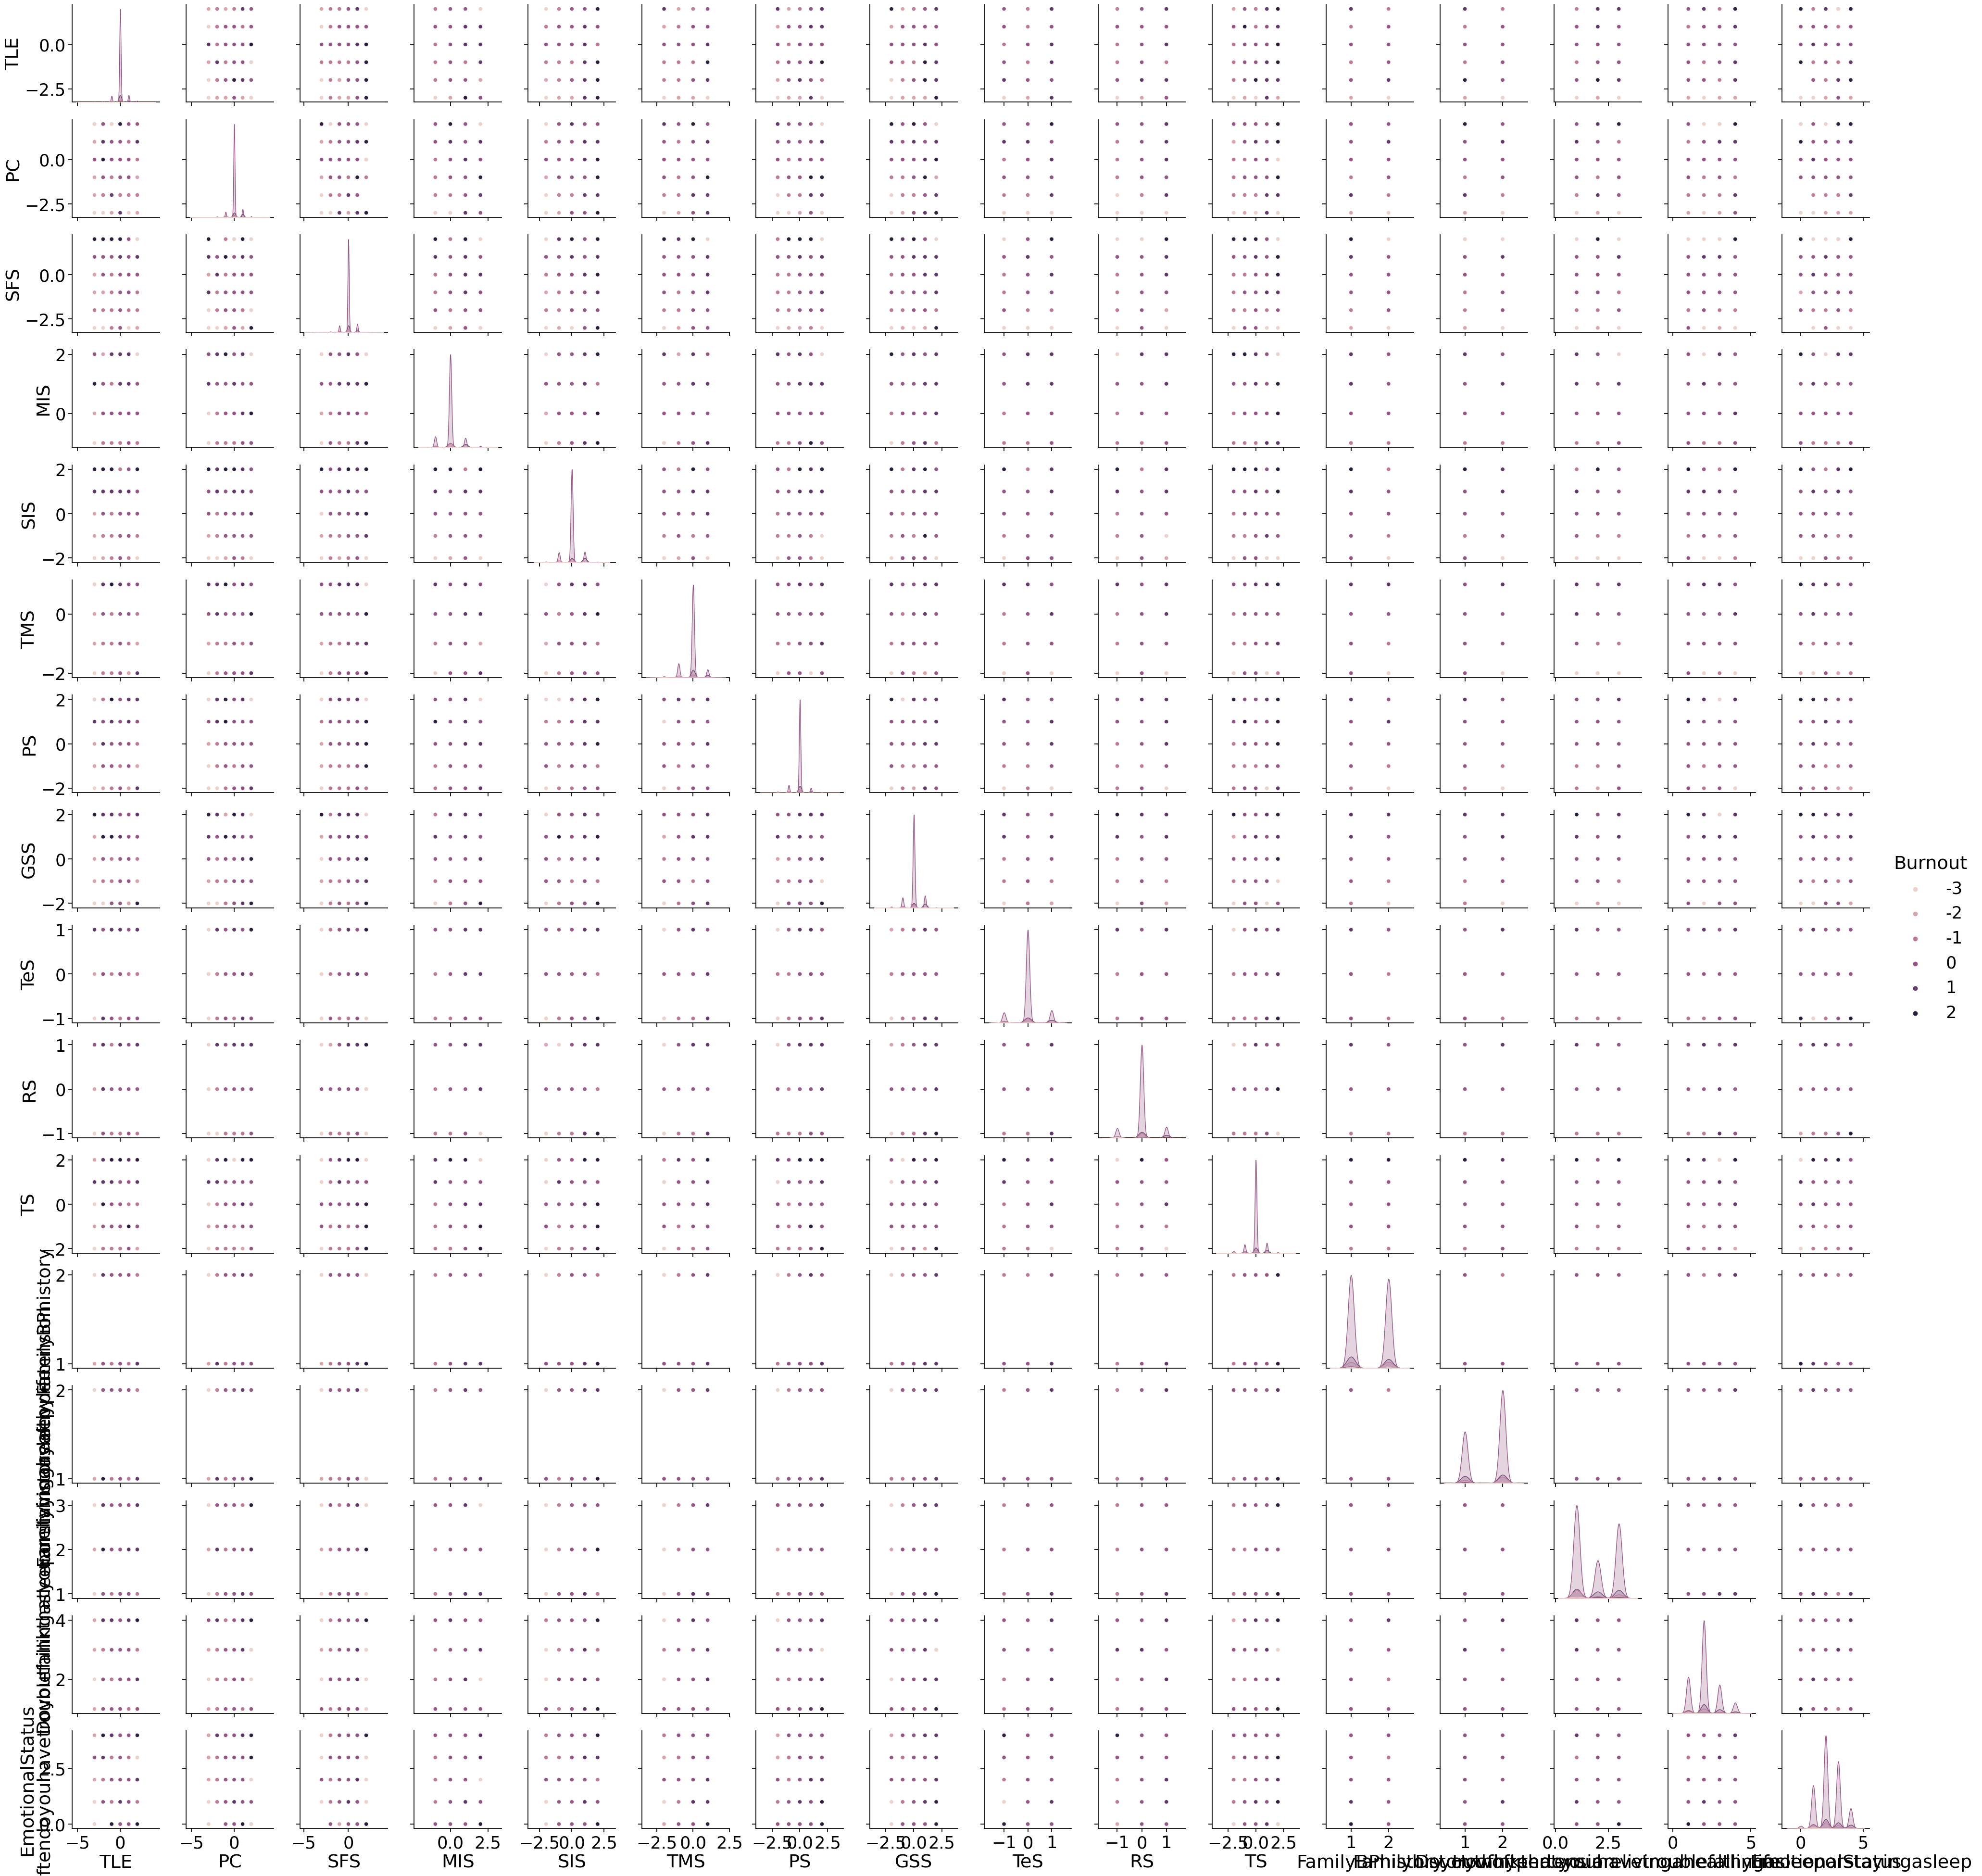

In [48]:
sns.pairplot(modified_data, hue = 'Burnout')